# Machine Learning Project using R Language : House Price Prediction
## Student : *Mohamed Sabkhi*
### Class : *2IDSD1*
![title](hpp.png)

**Table of Content**
1. Exploratory Data Analysis <br>
        -Reading The data
        -checking for Nulled values
        -Checking Data disrtibution & looking for outliers
        -Examining Correlations
        
2. Feature Extraction & Engineering
3. First Basic Linear Model
4. Removing Outliers
5. 

In [9]:
#install.packages("Hmisc")
#install.packages("corrplot")

library(tidyverse)
library(dplyr)
library(Hmisc)
library(corrplot) #for visualisation of correlation


Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  3.1.1     v purrr   0.3.2
v tidyr   1.1.3     v dplyr   1.0.6
v readr   1.3.1     v stringr 1.4.0
v tibble  3.1.1     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'Hmisc' was built under R version 3.6.3"Loading required package: lattice
Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.3"Loading required package: Formula
Warning message:
"package 'Formula' was built under R version 3.6.3"
Attaching packag

In [61]:
install.packages("glmnet")


  There is a binary version available but the source version is later:
       binary source needs_compilation
glmnet  4.1-1  4.1-3              TRUE

  Binaries will be installed
package 'glmnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\medsa\AppData\Local\Temp\Rtmpa0peiW\downloaded_packages


In [4]:
#install.packages("ggplot2")

library(ggplot2)


## Exploratory Data Analysis


### Reading The Data

In [1]:
data <- read.csv(file = 'home_data.csv')
head(data)

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [2]:
print(paste("Number of records: ", nrow(data)))
print(paste("Number of features: ", ncol(data)-1)) #id is not a feature

[1] "Number of records:  21613"
[1] "Number of features:  20"


In [3]:
str(data)

'data.frame':	21613 obs. of  21 variables:
 $ id           : num  7.13e+09 6.41e+09 5.63e+09 2.49e+09 1.95e+09 ...
 $ date         : Factor w/ 372 levels "20140502T000000",..: 165 221 291 221 284 11 57 252 340 306 ...
 $ price        : int  221900 538000 180000 604000 510000 1225000 257500 291850 229500 323000 ...
 $ bedrooms     : int  3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot     : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : int  7 7 6 7 8 11 7 7 7 7 ...
 $ sqft_above   : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement: int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : int  1955 1951 1933 1965 1987 2001 1

### checking for null values

In [73]:
sum(is.na(data))


[1] 0

It looks like we don't have any NULL values, I'll assume nulled values were previously changed by the respective medians of each column.

In [74]:
summary(data)

       id                         date           price            bedrooms     
 Min.   :1.000e+06   20140623T000000:  142   Min.   :  75000   Min.   : 0.000  
 1st Qu.:2.123e+09   20140625T000000:  131   1st Qu.: 321950   1st Qu.: 3.000  
 Median :3.905e+09   20140626T000000:  131   Median : 450000   Median : 3.000  
 Mean   :4.580e+09   20140708T000000:  127   Mean   : 540088   Mean   : 3.371  
 3rd Qu.:7.309e+09   20150427T000000:  126   3rd Qu.: 645000   3rd Qu.: 4.000  
 Max.   :9.900e+09   20150325T000000:  123   Max.   :7700000   Max.   :33.000  
                     (Other)        :20833                                     
   bathrooms      sqft_living       sqft_lot           floors     
 Min.   :0.000   Min.   :  290   Min.   :    520   Min.   :1.000  
 1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040   1st Qu.:1.000  
 Median :2.250   Median : 1910   Median :   7618   Median :1.500  
 Mean   :2.115   Mean   : 2080   Mean   :  15107   Mean   :1.494  
 3rd Qu.:2.500   3rd Qu.:

In [ ]:
# Draw a higtogram to figure out the distribution of SalePrice
options(scipen=10000)
ggplot(select_train, aes(x = SalePrice, fill = ..count..)) +
  geom_histogram(binwidth = 5000) +
  ggtitle("Figure 1 Histogram of SalePrice") +
  ylab("Count of houses") +
  xlab("Housing Price") + 
  theme(plot.title = element_text(hjust = 0.5))

## First Insights
We notice:<br>
-Most of our features are numerical.
-that the variable "sqft_lot", "sqft_basement", "yr_renovated", "sqft_lot15" have a large difference between their median and mean which indicates lot of outliers in respective variables. <br>
-we got work to do in yr_renovated , if the value is 0, it indicates that the house wasn't renovated, else, it gives us the year in which the house was renovated.<br>
-We'll try to exctract more insights from the date column to see the range of years our data was collected at.<br>
-latitude and longitude are around (47,-121)


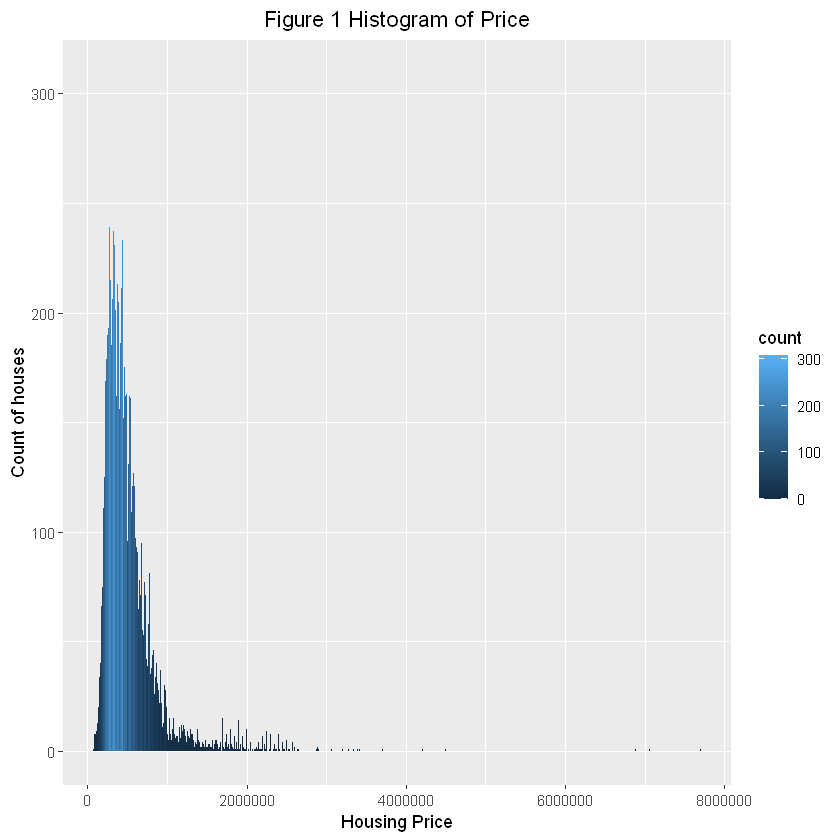

In [23]:
# Draw a higtogram to figure out the distribution of SalePrice
options(scipen=10000)
ggplot(data, aes(x = price, fill = ..count..)) +
  geom_histogram(binwidth = 5000) +
  ggtitle("Figure 1 Histogram of Price") +
  ylab("Count of houses") +
  xlab("Housing Price") + 
  theme(plot.title = element_text(hjust = 0.5))

**comment:**<br>
it looks like the value of the house prices are too skewed together, we need to apply log function to get a better distribution

# Feature Extraction


### Extracting Year, Month, Day Columns

In [10]:
data$date<-as.Date(data$date, "%Y%m%d")

In [11]:
data<-separate(data, "date", c("Year", "Month", "Day"), sep = "-")


In [12]:
data$Year=as.integer(data$Year)
data$Month=as.integer(data$Month)
data$Day=as.integer(data$Day)

print("last year in the dataset",str(max(data$Year)))
print("first year in the dataset",str(min(data$Year)))

 int 2015
[1] "last year in the dataset"
 int 2014
[1] "first year in the dataset"


In [13]:
#dropping the id and date columns
 df = data[,!(names(data) %in% c("id","date"))]

### Extracting House Age column

In [14]:
df$house_age <-2015 - df$yr_built

### Extracting sqft Difference 

In [15]:
df$sqft_difference <-df$sqft_lot15 - df$sqft_lot


### applying log on price

In [16]:
df$logPrice <- log(df$price)


## Examining Correlations
Correlation is a statistical method that showcase the linear dependence between two features.<br> Its value range between -1 to +1

If the dot is colored blue (correlation value = 1): it means positive correlation i.e. X is directly proportional to Y. <br>
If he dot is colored red (correlation value = -1): it means negative correlation i.e. X is inversly proportional to Y.

the intensity of the colors indicates the proportional correlation to the value (same case for both colors).<br>
Which indicates that value =0 means non existent correlation.

**As we can see:** <br>
-longitude doesn't have a high correlation with the price.<br>
-the zipcode is negatively correlated with the price. 

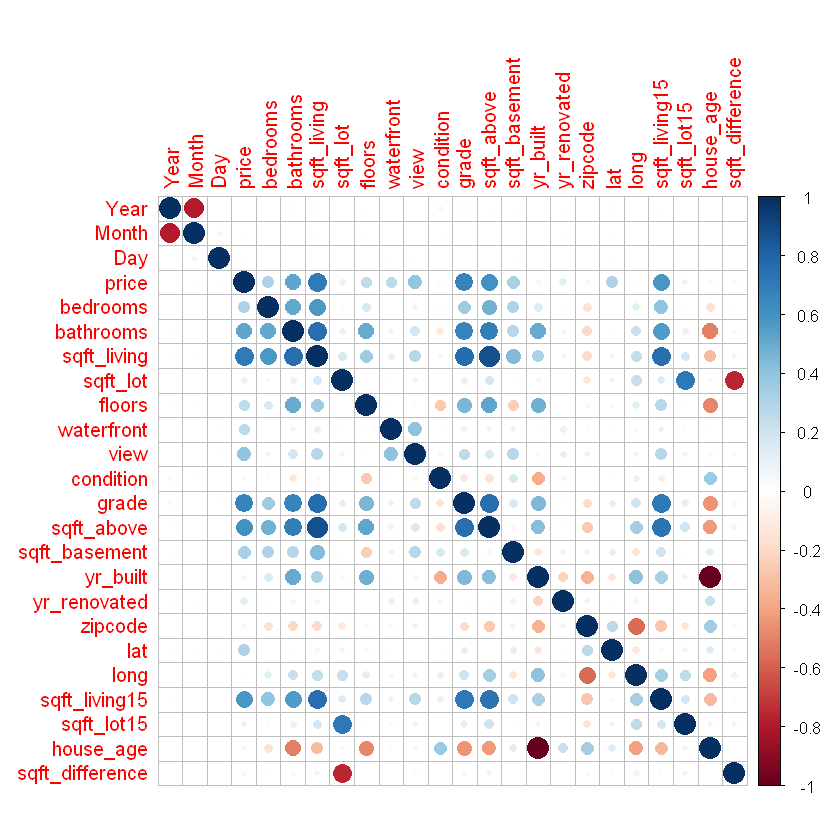

In [81]:
corrplot(cor(df))


### Plotting  sqft_living, sqft_living15 in relation to Price 


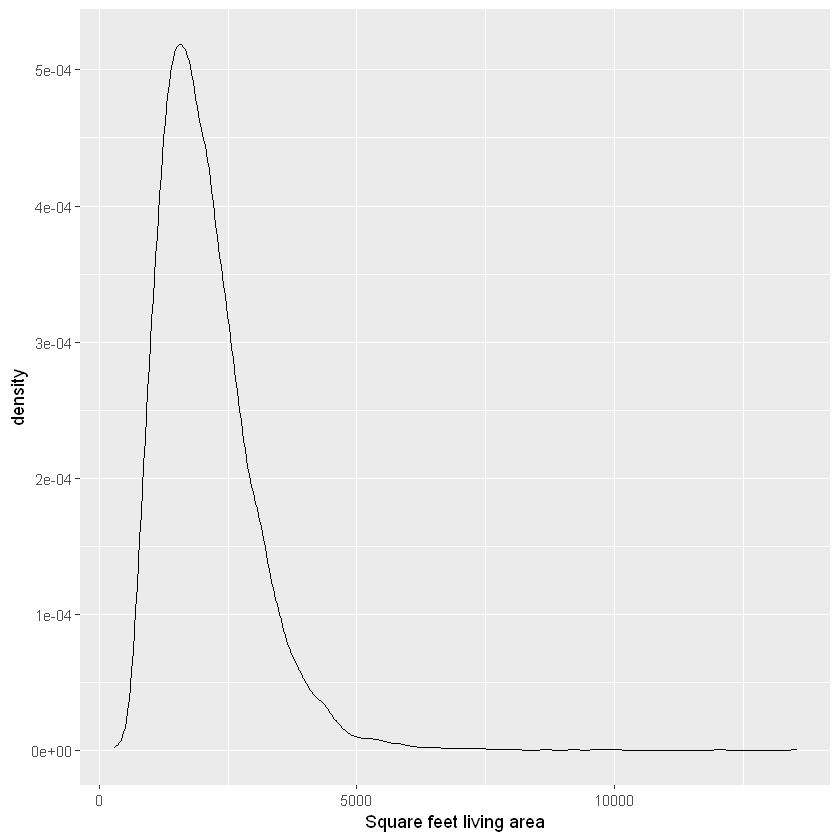

In [157]:
s1 <- ggplot(data= df, aes(x=sqft_living)) +
        geom_density() + labs(x='Square feet living area')
plot(s1)

Warning message:
"Removed 7 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 7 rows containing missing values (geom_point)."

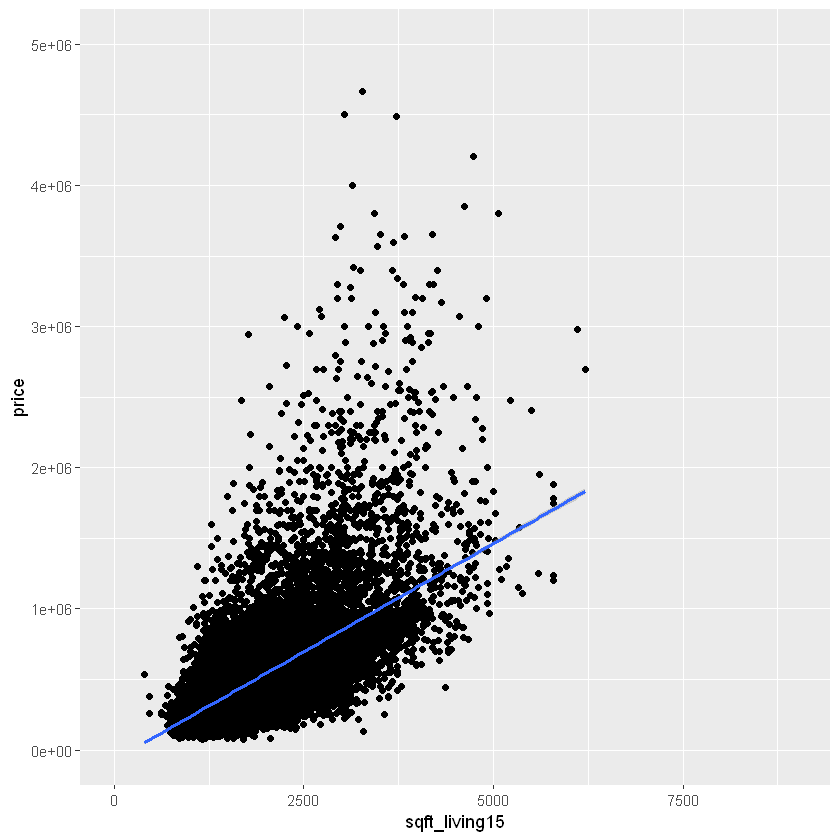

In [159]:
 ggplot(df,aes(y=price,x=sqft_living15)) +
       geom_point() + 
        xlim(0, 9000) +
        ylim(0, 5000000) +
        geom_smooth(formula = y ~ x,method="lm")

**Comment:**<br>it is almost the same
Based on the correlation matrix, we've seen a high correlation between sqft_living and sqft_living15. there's probably an information redundancy. let's double check that

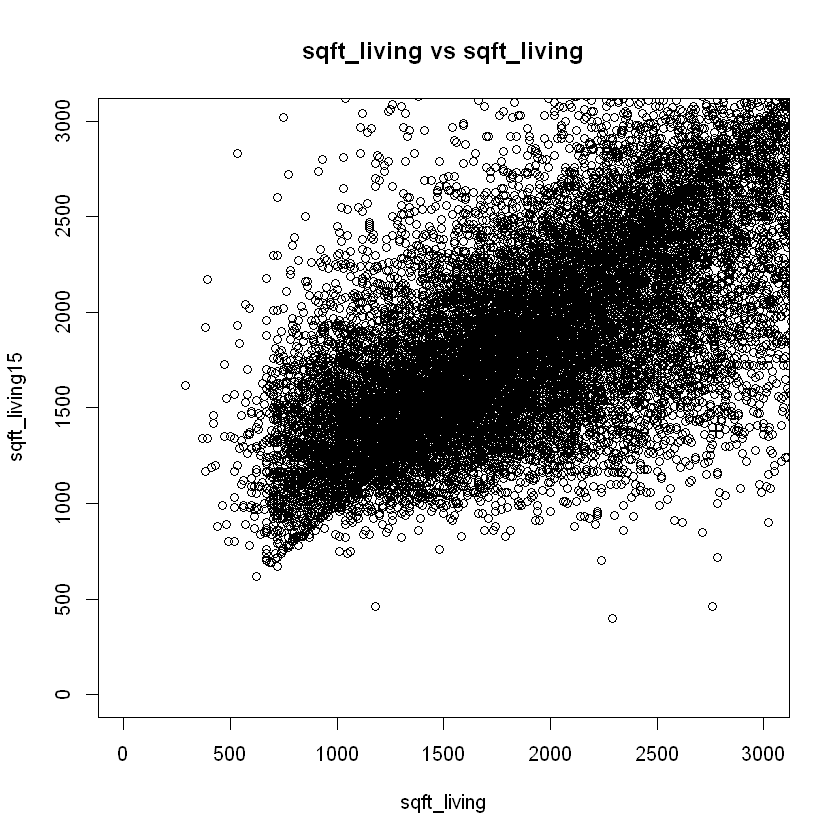

In [83]:
plot(x = df$sqft_living, y = df$sqft_living15,
     xlab = "sqft_living",
     ylab = "sqft_living15",
     xlim = c(0, 3000), 
     ylim = c(0, 3000),
     main = "sqft_living vs sqft_living"
)

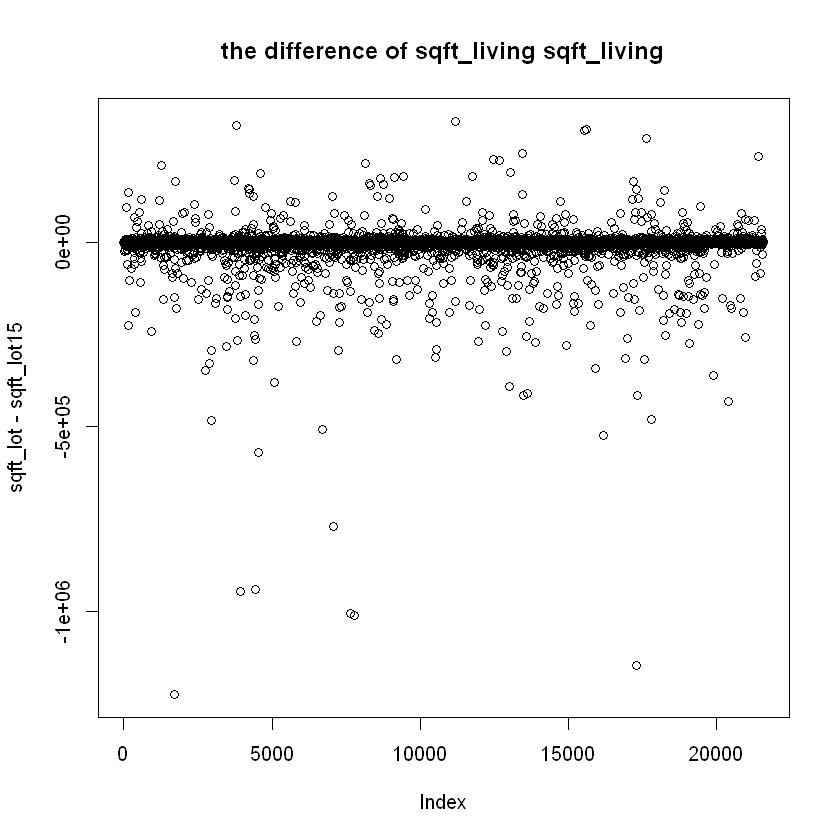

In [84]:
plot(df$sqft_lot15 -df$sqft_lot ,
     ylab = "sqft_lot - sqft_lot15",
     main = "the difference of sqft_living sqft_living" )

**Comment:**<br>
we notice that we don't have much difference in values between **sqft_lot** and **sqft_lot15**, we could generate a new feature later out of this difference. after removing the outliers of course.

### First Basic Linear Regression Model

In [17]:

# splitting data into train and test 
# 75% of the sample size
smp_size <- floor(0.75 * nrow(df))

set.seed(123)
train_ind <- sample(seq_len(nrow(df)), size = smp_size)

train <- df[train_ind, ]
test <- df[-train_ind, ]

In [20]:
colnames(df)

[1] "Year"            "Month"           "Day"             "price"          
 [5] "bedrooms"        "bathrooms"       "sqft_living"     "sqft_lot"       
 [9] "floors"          "waterfront"      "view"            "condition"      
[13] "grade"           "sqft_above"      "sqft_basement"   "yr_built"       
[17] "yr_renovated"    "zipcode"         "lat"             "long"           
[21] "sqft_living15"   "sqft_lot15"      "house_age"       "sqft_difference"
[25] "logPrice"

In [21]:
linearmodel = lm(logPrice~Year+Month+Day+bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15+house_age+sqft_difference,
                 data = train)
summary(linearmodel)
#Our key objective is to determine the variable(s) that would give best predictive model.


Call:
lm(formula = logPrice ~ Year + Month + Day + bedrooms + bathrooms + 
    sqft_living + sqft_lot + floors + waterfront + view + condition + 
    grade + sqft_above + sqft_basement + yr_built + yr_renovated + 
    zipcode + lat + long + sqft_living15 + sqft_lot15 + house_age + 
    sqft_difference, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.71844 -0.15907  0.00312  0.15716  1.21947 

Coefficients: (3 not defined because of singularities)
                        Estimate       Std. Error t value             Pr(>|t|)
(Intercept)     -130.73634001057   14.39300295274  -9.083 < 0.0000000000000002
Year               0.06195804472    0.00680697501   9.102 < 0.0000000000000002
Month              0.00148956216    0.00102275561   1.456             0.145296
Day               -0.00057343251    0.00022900489  -2.504             0.012289
bedrooms          -0.00947519892    0.00272416355  -3.478             0.000506
bathrooms          0.07185984047    0.004704273

Appearently we only have data ranging between 2014 and 2015, that explains why sqft_living and sqft_living15 are highly correlated. 

Variables 'sqft_lot', 'Day', 'Month' have very high Pr(>|t|) value and low significance, it makes sense that day and month aren't helping our model predictions. however we'll need to remove outliers from sqft_lot for better predictions.
the house_age and sqft_difference turned out to be useless, so we'll drop them.

### Removing Outliers 

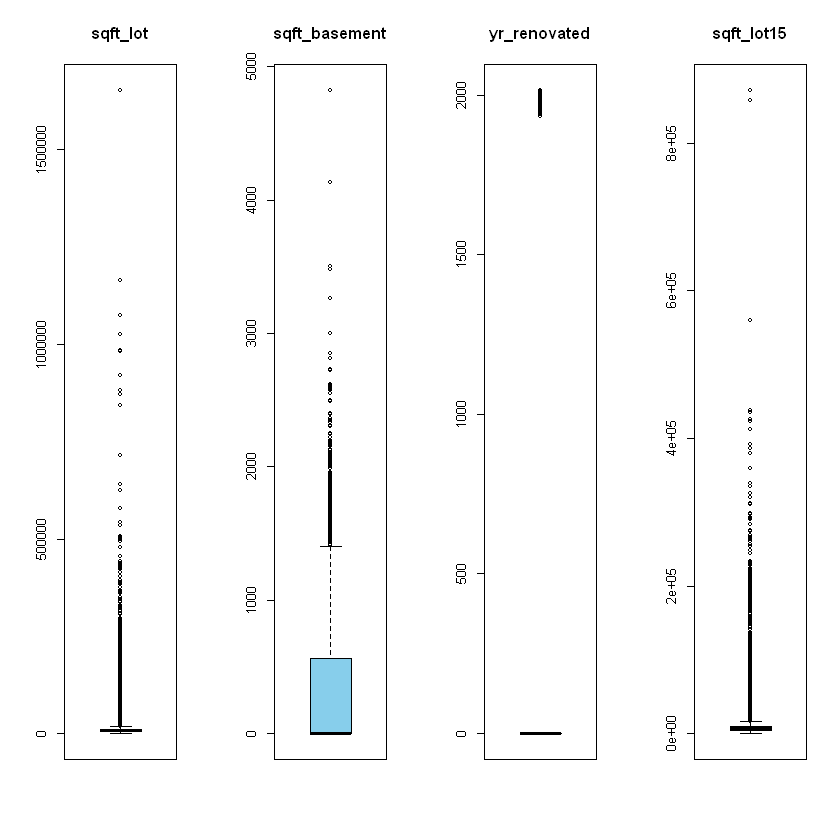

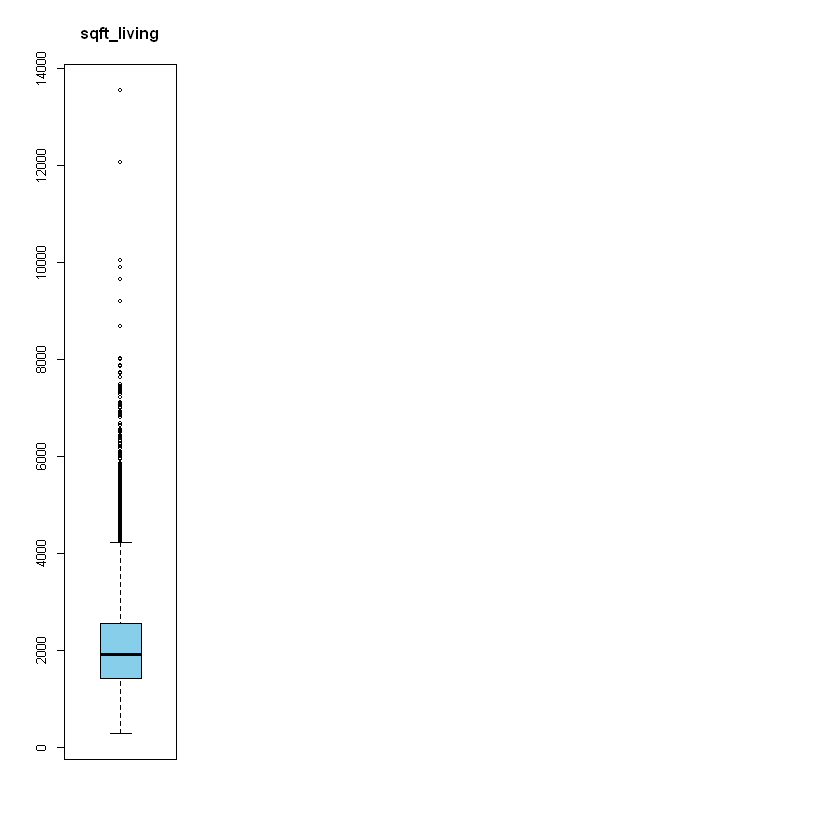

In [113]:
par(mfrow = c(1, 4))
boxplot(df$sqft_lot, main='sqft_lot',col='Sky Blue')
boxplot(df$sqft_basement, main='sqft_basement',col='Sky Blue')
boxplot(df$yr_renovated, main='yr_renovated',col='Sky Blue')
boxplot(df$sqft_lot15, main='sqft_lot15',col='Sky Blue')
boxplot(df$sqft_living, main='sqft_living',col='Sky Blue')


In [38]:
#removing outliers from sqft_lot column using IQR method
Q <- quantile(df$sqft_lot, probs=c(.25, .75), na.rm = FALSE)
iqr <- IQR(df$sqft_lot)
up <-  Q[2]+1.5*iqr # Upper Range  
low<- Q[1]-1.5*iqr # Lower Range﻿
df_without_outliers_sqft_lot<- subset(df, df$sqft_lot > (Q[1] - 1.5*iqr) & df$sqft_lot < (Q[2]+1.5*iqr))


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [39]:
#removing outliers from sqft_lot15 column
Q15 <- quantile(df$sqft_lot15, probs=c(.25, .75), na.rm = FALSE)
outliers15<-boxplot(df_without_outliers_sqft_lot$sqft_lot15, plot=FALSE)$out
iqr15 <- IQR(df_without_outliers_sqft_lot$sqft_lot15)
up15<-  Q15[2]+1.5*iqr15 # Upper Range  
low15<- Q15[1]-1.5*iqr15 # Lower Range﻿
df_outlied<- subset(df_without_outliers_sqft_lot, df_without_outliers_sqft_lot$sqft_lot15 > (Q15[1] - 1.5*iqr15) & df_without_outliers_sqft_lot$sqft_lot15 < (Q15[2]+1.5*iqr15))


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [40]:
head(df_outlied)

,Year,Month,Day,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,sqft_difference,logPrice
1,2014,10,13,221900,3,1.00,1180,5650,1,0,...,1955,0,98178,47.5112,-122.257,1340,5650,60,0,12.30998
2,2014,12,9,538000,3,2.25,2570,7242,2,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,64,397,13.19561
3,2015,2,25,180000,2,1.00,770,10000,1,0,...,1933,0,98028,47.7379,-122.233,2720,8062,82,-1938,12.10071
4,2014,12,9,604000,4,3.00,1960,5000,1,0,...,1965,0,98136,47.5208,-122.393,1360,5000,50,0,13.31133
5,2015,2,18,510000,3,2.00,1680,8080,1,0,...,1987,0,98074,47.6168,-122.045,1800,7503,28,-577,13.14217
7,2014,6,27,257500,3,2.25,1715,6819,2,0,...,1995,0,98003,47.3097,-122.327,2238,6819,20,0,12.45877


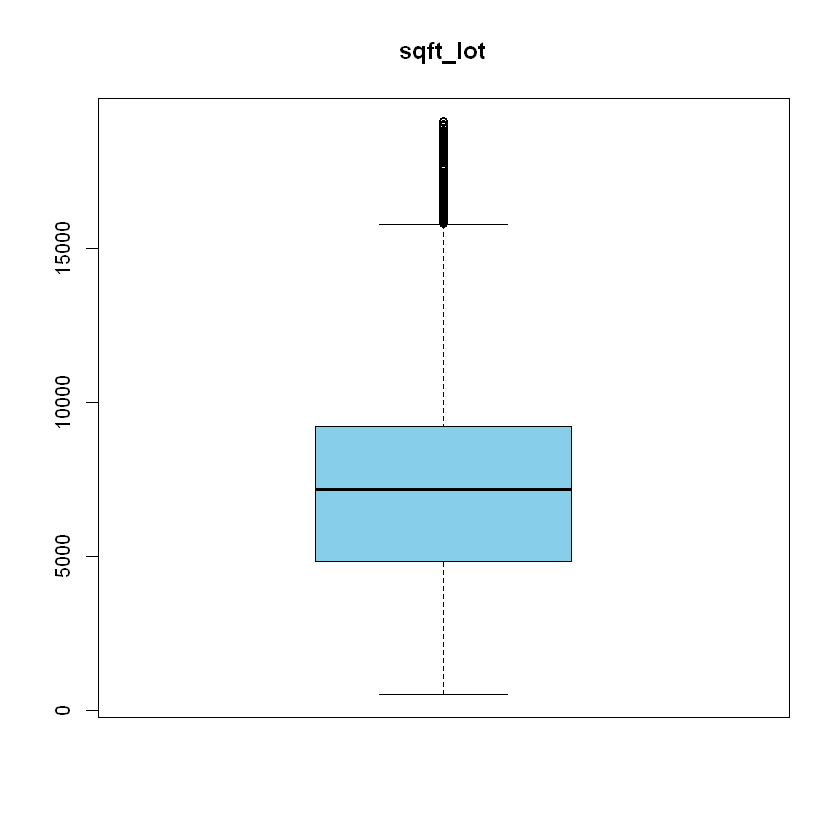

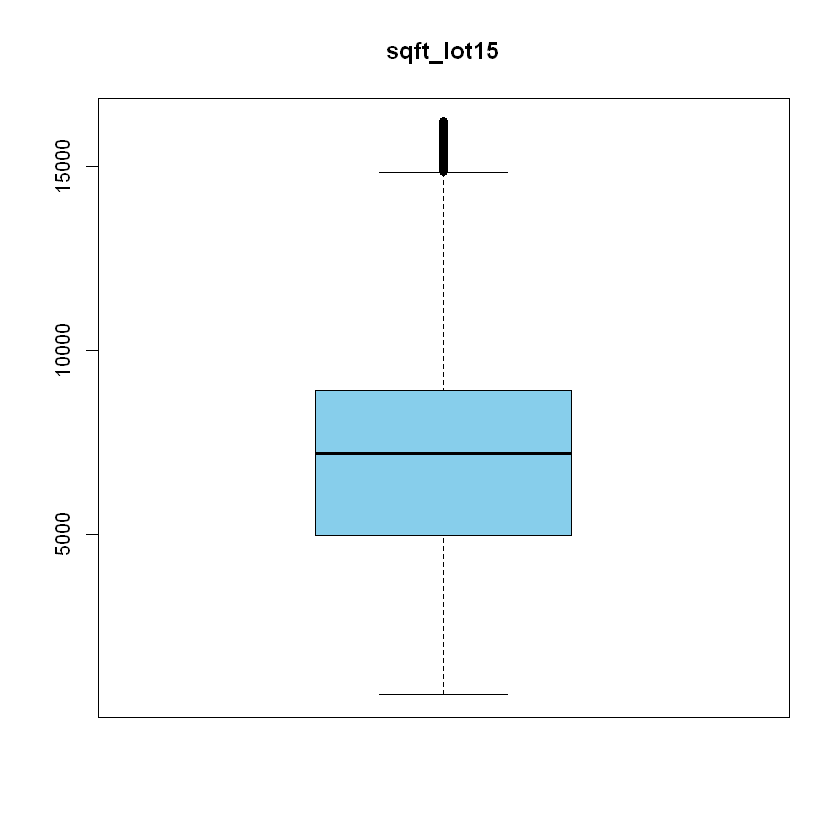

In [117]:
boxplot(df_outlied$sqft_lot, main='sqft_lot',col='Sky Blue')
boxplot(df_outlied$sqft_lot15, main='sqft_lot15',col='Sky Blue')


### Removing Bedrooms, sqft_living outliers

In [41]:
df_outlied<- subset(df_outlied, df_outlied$bedrooms < 15 & df_outlied$sqft_living <8000 )


### Removing views Outliers

In [46]:
df_outlied<- subset(df_outlied, df_outlied$view < 15 & df_outlied$sqft_living <8000 )


While we'r eat it, let's drop the features with high p-values

In [62]:
 df_outlied = df_outlied[,!(names(df_outlied) %in% c("sqft_lot","Month","Day","sqft_difference","house_age","price","sqft_basement","sqft_above"))]
colnames(df_outlied)

[1] "Year"          "bedrooms"      "bathrooms"     "sqft_living"  
 [5] "floors"        "waterfront"    "view"          "condition"    
 [9] "grade"         "yr_built"      "yr_renovated"  "zipcode"      
[13] "lat"           "long"          "sqft_living15" "sqft_lot15"   
[17] "logPrice"

In [63]:
colnames(df_outlied)

[1] "Year"          "bedrooms"      "bathrooms"     "sqft_living"  
 [5] "floors"        "waterfront"    "view"          "condition"    
 [9] "grade"         "yr_built"      "yr_renovated"  "zipcode"      
[13] "lat"           "long"          "sqft_living15" "sqft_lot15"   
[17] "logPrice"

## Second Model after dropping outliers and removing features with high p-value score

In [64]:
# 75% of the sample size
smp_size2 <- floor(0.75 * nrow(df_outlied))

set.seed(123)
train_ind2 <- sample(seq_len(nrow(df_outlied)), size = smp_size2)

train_eliminated <- df_outlied[train_ind2, ]
test_eliminated <- df_outlied[-train_ind2, ]

In [65]:
lm_outlied = lm(logPrice~. ,
                 data = train_eliminated)
summary(lm_outlied)


Call:
lm(formula = logPrice ~ ., data = train_eliminated)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.48074 -0.14729  0.00439  0.14842  1.15917 

Coefficients:
                     Estimate      Std. Error t value             Pr(>|t|)    
(Intercept)   -102.9682676986    9.7257433443 -10.587 < 0.0000000000000002 ***
Year             0.0532458581    0.0043315996  12.292 < 0.0000000000000002 ***
bedrooms        -0.0135173221    0.0029875714  -4.525       0.000006102878 ***
bathrooms        0.0590454377    0.0048562172  12.159 < 0.0000000000000002 ***
sqft_living      0.0001744931    0.0000054850  31.813 < 0.0000000000000002 ***
floors           0.0241152040    0.0052354284   4.606       0.000004137766 ***
waterfront       0.4296404656    0.0354052470  12.135 < 0.0000000000000002 ***
view             0.0583392912    0.0033485361  17.422 < 0.0000000000000002 ***
condition        0.0630704212    0.0034894448  18.075 < 0.0000000000000002 ***
grade            0.1746413260   

### Dropping features

we'll drop features with less than 2e-16 as a Pr(>|t|) 

In [56]:
 df_dropped_f = df_outlied[,!(names(df_outlied) %in% c("yr_built","zipcode","long","condition","floors","sqft_living15","yr_renovated","sqft_basement","sqft_above"))]
colnames(df_dropped_f)

[1] "Year"        "bedrooms"    "bathrooms"   "sqft_living" "waterfront" 
 [6] "view"        "grade"       "lat"         "sqft_lot15"  "logPrice"

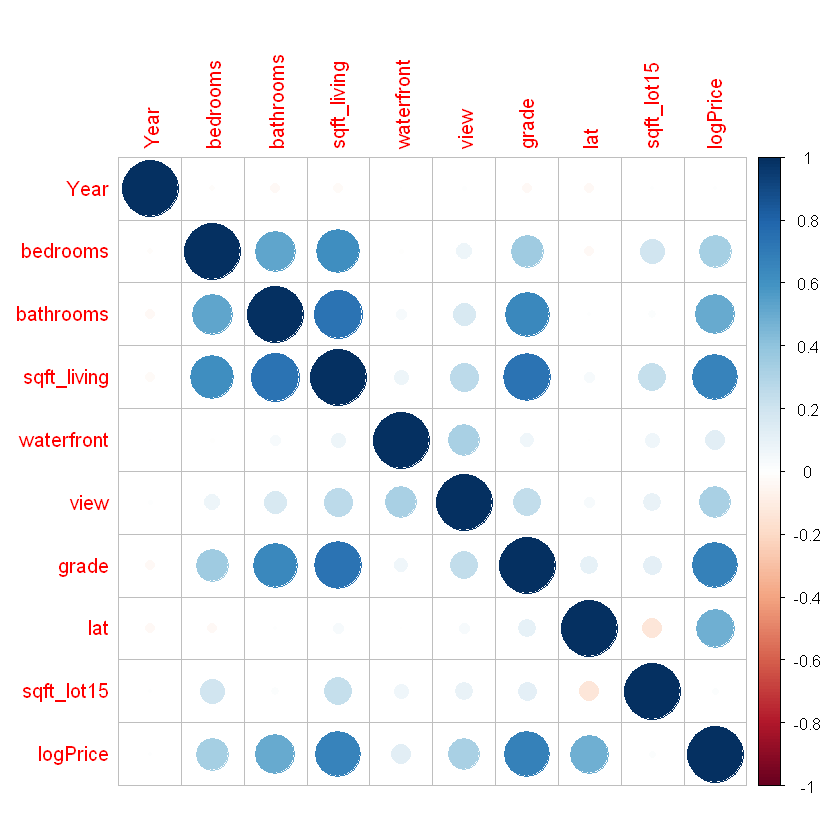

In [57]:
corrplot(cor(df_dropped_f))


In [59]:
# 75% of the sample size
smp_size3 <- floor(0.75 * nrow(df_dropped_f))

set.seed(123)
train_ind3 <- sample(seq_len(nrow(df_dropped_f)), size = smp_size2)

train_dropped <- df_dropped_f[train_ind3, ]
test_dropped <- df_outlied[-train_ind3, ]
lm_dropped = lm(logPrice~.,
                 data = train_dropped)
summary(lm_dropped)


Call:
lm(formula = logPrice ~ ., data = train_dropped)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.53847 -0.16346 -0.00591  0.15483  1.18369 

Coefficients:
                   Estimate      Std. Error t value             Pr(>|t|)    
(Intercept) -148.6266388327    9.6424011078 -15.414 < 0.0000000000000002 ***
Year           0.0426250890    0.0047591454   8.956 < 0.0000000000000002 ***
bedrooms      -0.0027143452    0.0032655408  -0.831              0.40587    
bathrooms     -0.0126568053    0.0047787235  -2.649              0.00809 ** 
sqft_living    0.0002512766    0.0000054488  46.116 < 0.0000000000000002 ***
waterfront     0.4073843105    0.0388181322  10.495 < 0.0000000000000002 ***
view           0.0876683470    0.0035518071  24.683 < 0.0000000000000002 ***
grade          0.1525304153    0.0032341511  47.162 < 0.0000000000000002 ***
lat            1.5607995686    0.0167413408  93.230 < 0.0000000000000002 ***
sqft_lot15    -0.0000132364    0.0000007891 -16.775 < 0

**comment**<br>
even though we only kept the values with high correlation with price, we had a very bad prediction accuracy. 

## Using Ridge Regression

In [70]:
library(glmnet)

Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required package: Matrix

Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack

Loaded glmnet 4.1-1


In [82]:
y<- df_outlied$logPrice

x <- data.matrix(df_outlied[, c('Year', 'bedrooms' ,'bathrooms', 'sqft_living' ,'floors', 'waterfront', 'view' ,'condition', 'grade', 'yr_built' ,'yr_renovated' ,'zipcode', 'lat' ,'long' ,'sqft_living15' ,'sqft_lot15')])

In [84]:
model <- glmnet(x, y, alpha = 0)


In [85]:
summary(model)

          Length Class     Mode   
a0         100   -none-    numeric
beta      1600   dgCMatrix S4     
df         100   -none-    numeric
dim          2   -none-    numeric
lambda     100   -none-    numeric
dev.ratio  100   -none-    numeric
nulldev      1   -none-    numeric
npasses      1   -none-    numeric
jerr         1   -none-    numeric
offset       1   -none-    logical
call         4   -none-    call   
nobs         1   -none-    numeric

[1] 0.0339318

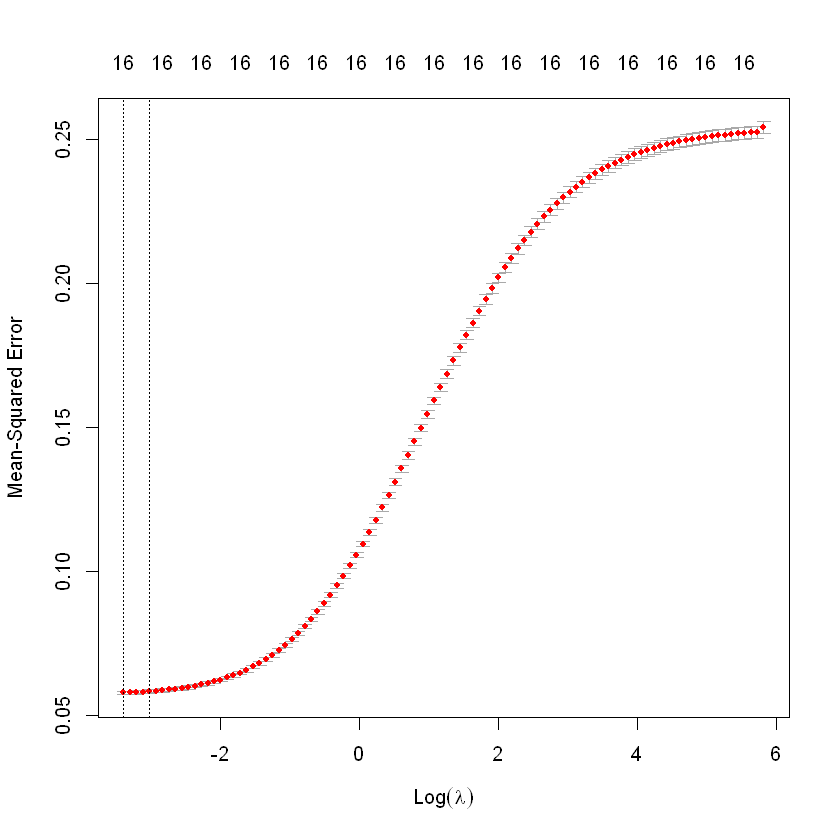

In [86]:
#perform k-fold cross-validation to find optimal lambda value
cv_model <- cv.glmnet(x, y, alpha = 0)

#find optimal lambda value that minimizes test MSE
best_lambda <- cv_model$lambda.min
best_lambda


#produce plot of test MSE by lambda value
plot(cv_model) 

In [87]:
#coefficients of best model
best_model <- glmnet(x, y, alpha = 0, lambda = best_lambda)
coef(best_model)

17 x 1 sparse Matrix of class "dgCMatrix"
                            s0
(Intercept)   -104.44344690215
Year             0.04725457667
bedrooms        -0.00670461721
bathrooms        0.06159466217
sqft_living      0.00016064591
floors           0.03310329001
waterfront       0.41522558107
view             0.06094890637
condition        0.06481700376
grade            0.15486501958
yr_built        -0.00311770245
yr_renovated     0.00004094543
zipcode         -0.00052868707
lat              1.38396385839
long            -0.10178822330
sqft_living15    0.00011904432
sqft_lot15      -0.00001567887

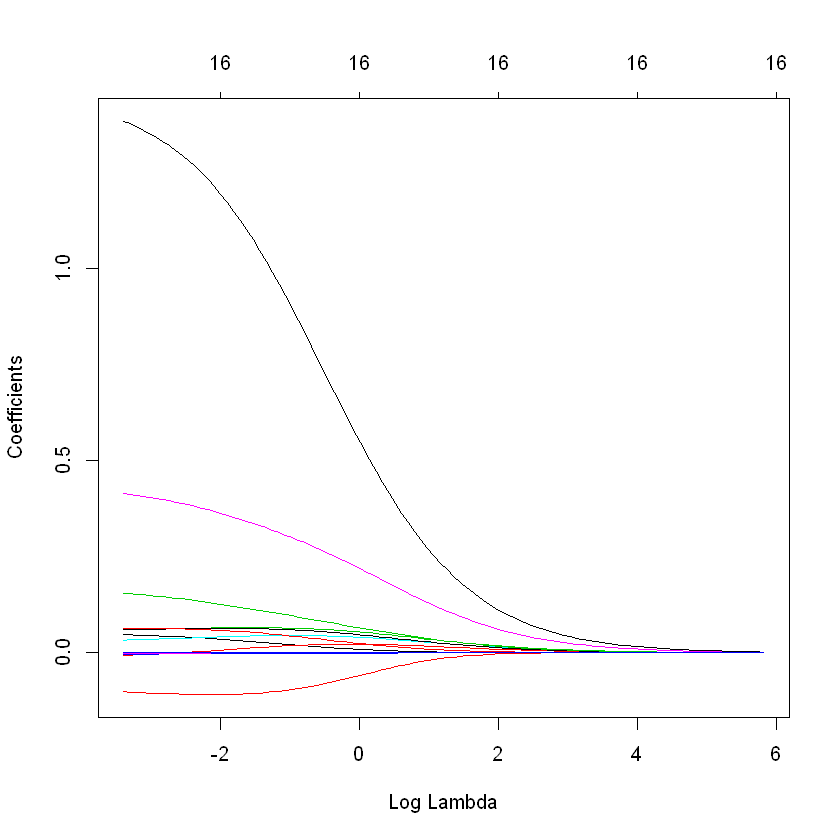

In [88]:
# a plot of different coefficient of Ridge 
plot(model, xvar = "lambda")

In [89]:
#use fitted best model to make predictions
y_predicted <- predict(model, s = best_lambda, newx = x)

#find SST and SSE
sst <- sum((y - mean(y))^2)
sse <- sum((y_predicted - y)^2)

#find R-Squared
rsq <- 1 - sse/sst
rsq

[1] 0.7724864

### Using Lasso Regression

[1] 0.0006660951

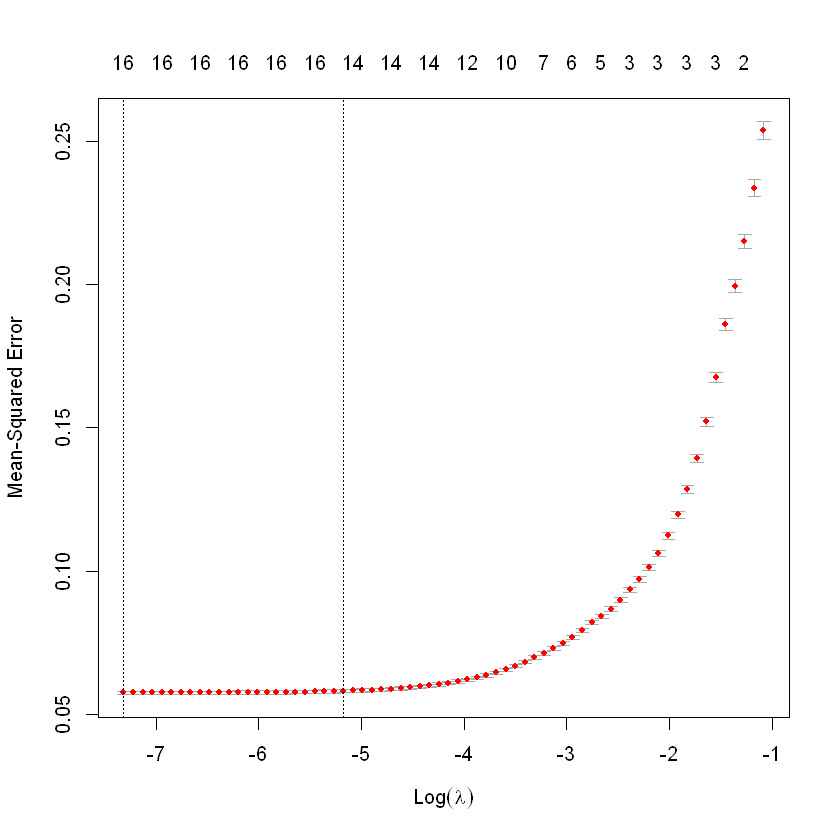

In [99]:

#perform k-fold cross-validation to find optimal lambda value
cv_model <- cv.glmnet(x, y, alpha =1)

#find optimal lambda value that minimizes test MSE
best_lambda <- cv_model$lambda.min
best_lambda



#produce plot of test MSE by lambda value
plot(cv_model) 

In [100]:
best_model <- glmnet(x, y, alpha = 1, lambda = best_lambda)
coef(best_model)

17 x 1 sparse Matrix of class "dgCMatrix"
                           s0
(Intercept)   -98.79357860378
Year            0.05075057088
bedrooms       -0.01284791915
bathrooms       0.05563681482
sqft_living     0.00017756262
floors          0.02606270432
waterfront      0.43187790563
view            0.05859199233
condition       0.06428657175
grade           0.17056690919
yr_built       -0.00353663490
yr_renovated    0.00003392038
zipcode        -0.00065653461
lat             1.45372793624
long           -0.07961424114
sqft_living15   0.00010577975
sqft_lot15     -0.00001790522

In [101]:
y_predicted <- predict(best_model, s = best_lambda, newx = x)

#find SST and SSE
sst <- sum((y - mean(y))^2)
sse <- sum((y_predicted - y)^2)

#find R-Squared
rsq <- 1 - sse/sst
rsq

[1] 0.7745046

# Accuracy Results:
**basic Linear Model:**                                           R-squared:  0.7741 <br>

**Linear Model after dropping outliers:**                         R-squared:  0.7754<br>

**Linear Model after dropping features with high p-value score:** R-squared:  0.7276<br>

**Ridge Regression Model:**                                       MAE: 0.7724<br>

**Lasso Regression Model:**                                       MAE: 0.7745<br>